# Solving a Regression Problem using ANN

In this notebook we are going to explore the House Sales in King County, USA dataset, preprocess it, and apply Artificial Neural Network model to predict the price of houses.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [50]:
import warnings
#warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
print(os.listdir("../BD00-Datasets"))

plt.style.use('bmh')
sns.set_style('whitegrid')
pd.set_option("display.float_format", '{:.2f}'.format)


['csv-datasets', 'db-datasets', 'New folder', '__MACOSX']


# **About the Data**
***
We will be using data from a Kaggle data set:
[harlfoxem - housesalesprediction](https://www.kaggle.com/harlfoxem/housesalesprediction)

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [51]:
df = pd.read_csv('../BD00-Datasets/csv-datasets/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


# 1. **Exploratory Data Analysis**
***
### Check for missing values

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


## Inspecting Outliers
***

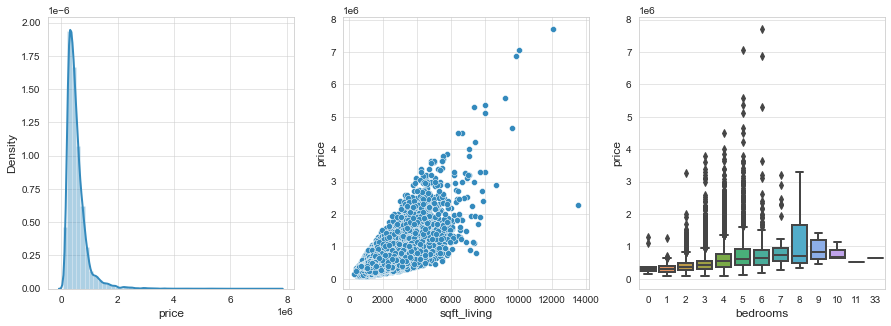

In [54]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.distplot(df['price'])

plt.subplot(1, 3, 2)
sns.scatterplot(y='price', x='sqft_living', data=df)

plt.subplot(1, 3, 3)
sns.boxplot(y='price', x='bedrooms', data=df);

### Geographical Properties
***

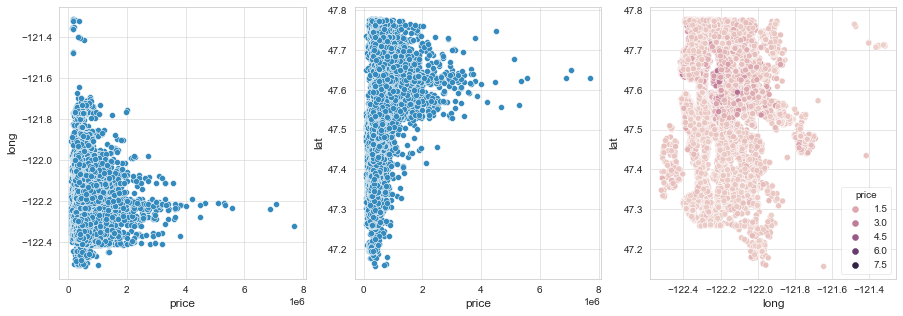

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='price', y='long', data=df)

plt.subplot(1, 3, 2)
sns.scatterplot(x='price', y='lat', data=df)

plt.subplot(1, 3, 3)
sns.scatterplot(x='long', y='lat', data=df, hue='price');

In [56]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

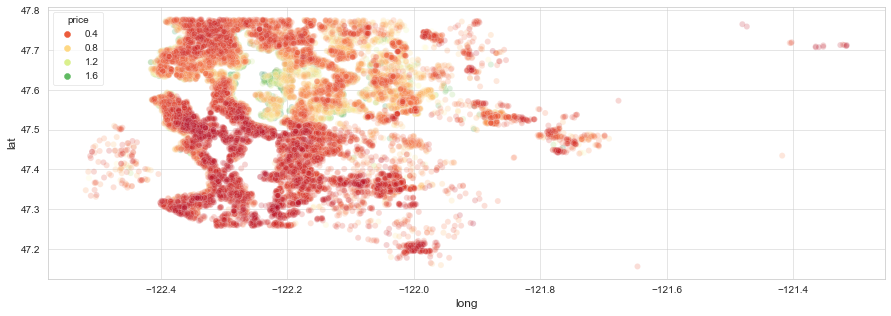

In [57]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, 
                hue='price', palette='RdYlGn', alpha=0.2);

### Other Features
***

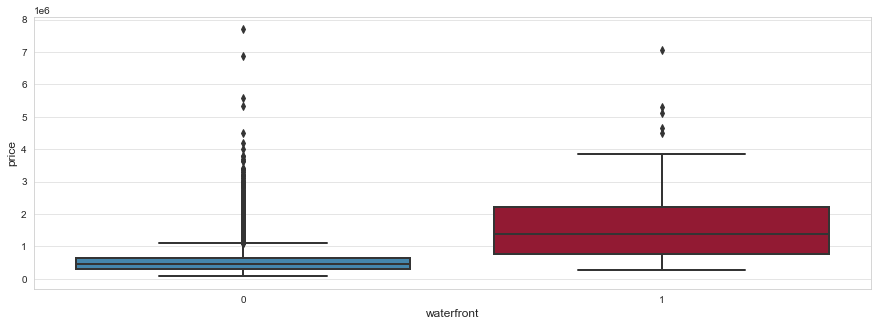

In [58]:
plt.figure(figsize=(15,5))
sns.boxplot(x='waterfront',y='price',data=df);

## Working with Feature Data
***
### Feature Engineering from Date

In [59]:
df = df.drop('id',axis=1)

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

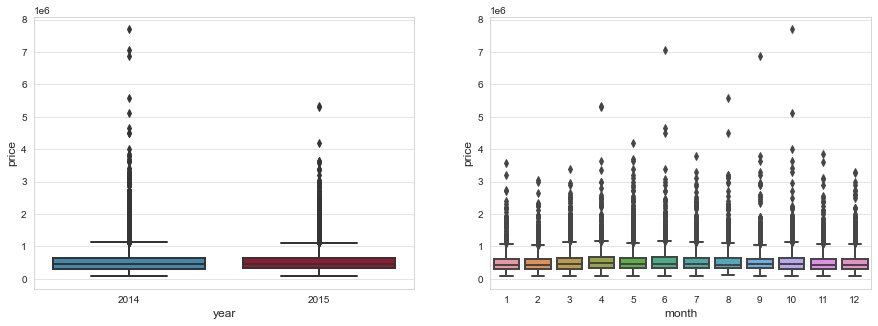

In [60]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.boxplot(x='year',y='price',data=df)

plt.subplot(1, 2, 2)
sns.boxplot(x='month',y='price',data=df);

C:\compilers\Python\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


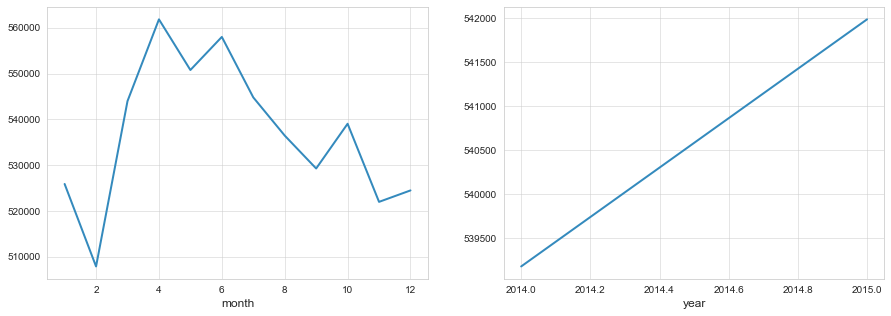

In [61]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
df.groupby('month').mean()['price'].plot()

plt.subplot(1, 2, 2)
df.groupby('year').mean()['price'].plot();

In [62]:
df = df.drop('date',axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [63]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [64]:
df = df.drop('zipcode',axis=1)

In [65]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,47.51,-122.26,1340,5650,10,2014
1,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,47.72,-122.32,1690,7639,12,2014
2,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,47.74,-122.23,2720,8062,2,2015
3,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,47.52,-122.39,1360,5000,12,2014
4,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,47.62,-122.05,1800,7503,2,2015


In [66]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [67]:
df['sqft_basement'].value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split
***

In [113]:
X = df.drop('price',axis=1)
y = df['price']

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(15129, 19)
(6484, 19)


# 2. Model Building
***

In [115]:
from sklearn import metrics

def print_evaluate(clf, X, y, train=True):
    try:  
        pred = clf.predict(X)
        mae  = metrics.mean_absolute_error(y, pred)
        mse  = metrics.mean_squared_error(y, pred)
        rmse = np.sqrt(metrics.mean_squared_error(y, pred))
        r2   = metrics.r2_score(y, pred)
        r2_adj = 1 - ((1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1))
    finally:
        if train:
            print(f"\n:: Training Result {'='*26}\n{'-'*45}")
        elif not train:         
            print(f"\n:: Testing Result {'='*27}\n{'-'*45}")
        print(f"Mean Absolute Error\t: {mae:.2f}")
        print(f"Mean Squared Error\t: {mse:.2f}")
        print(f"Root Mean Squared Error\t: {rmse:.2f}\n{'-'*45}")
        print(f"R-Square Score\t\t: {r2:.5f}")
        print(f"Adjusted R2 Score\t: {r2_adj:.5f}\n{'='*45}")

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [111]:
model = Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')

## Training the Model
***

In [117]:
r = model.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=128,
              epochs=500,
              verbose=0);

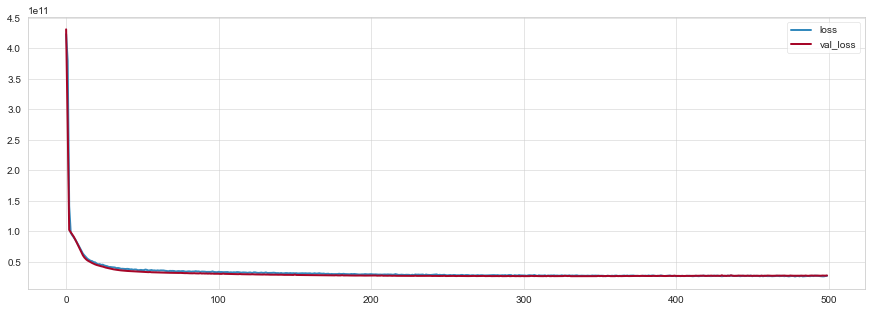

In [118]:
plt.figure(figsize=(15, 5))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend(loc='best');

## Evaluation on Train Data
***

In [119]:
print_evaluate(model, X_train, y_train, train=True)
#print_evaluate(model, X_test, y_test, train=False)


:: Training Result ==========================
---------------------------------------------
Mean Absolute Error	: 100737.43
Mean Squared Error	: 24755412398.90
Root Mean Squared Error	: 157338.53
---------------------------------------------
R-Square Score		: 0.81305
Adjusted R2 Score	: 0.81282


## Evaluation on Test Data
***

In [120]:
print_evaluate(model, X_test, y_test, train=False)


:: Testing Result ===========================
---------------------------------------------
Mean Absolute Error	: 102389.45
Mean Squared Error	: 27895587452.70
Root Mean Squared Error	: 167019.72
---------------------------------------------
R-Square Score		: 0.80114
Adjusted R2 Score	: 0.80055


## **Is this a good result**
***
### It means that our prediction of a house price will be  `[+/- MAE value]` from the `price` average value.  

y_pred = model.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test})
df_pred['Predicted'] = y_pred

print("\nPrediction results:")
df_pred.T
